In [32]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [33]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

## load data from files
splits them from each folders

In [34]:
dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "../data/PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [35]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [36]:
len(dataset)

645

2023-02-13 17:31:02.525179: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 12 10  6
 10 12  9 13  7  4  1  7]
(256, 256, 3)
(32, 256, 256, 3)
[ 0  1  7  2  1 14 10  1 10  6  3  3  0  2  6  5  0 12 14 13 11 1

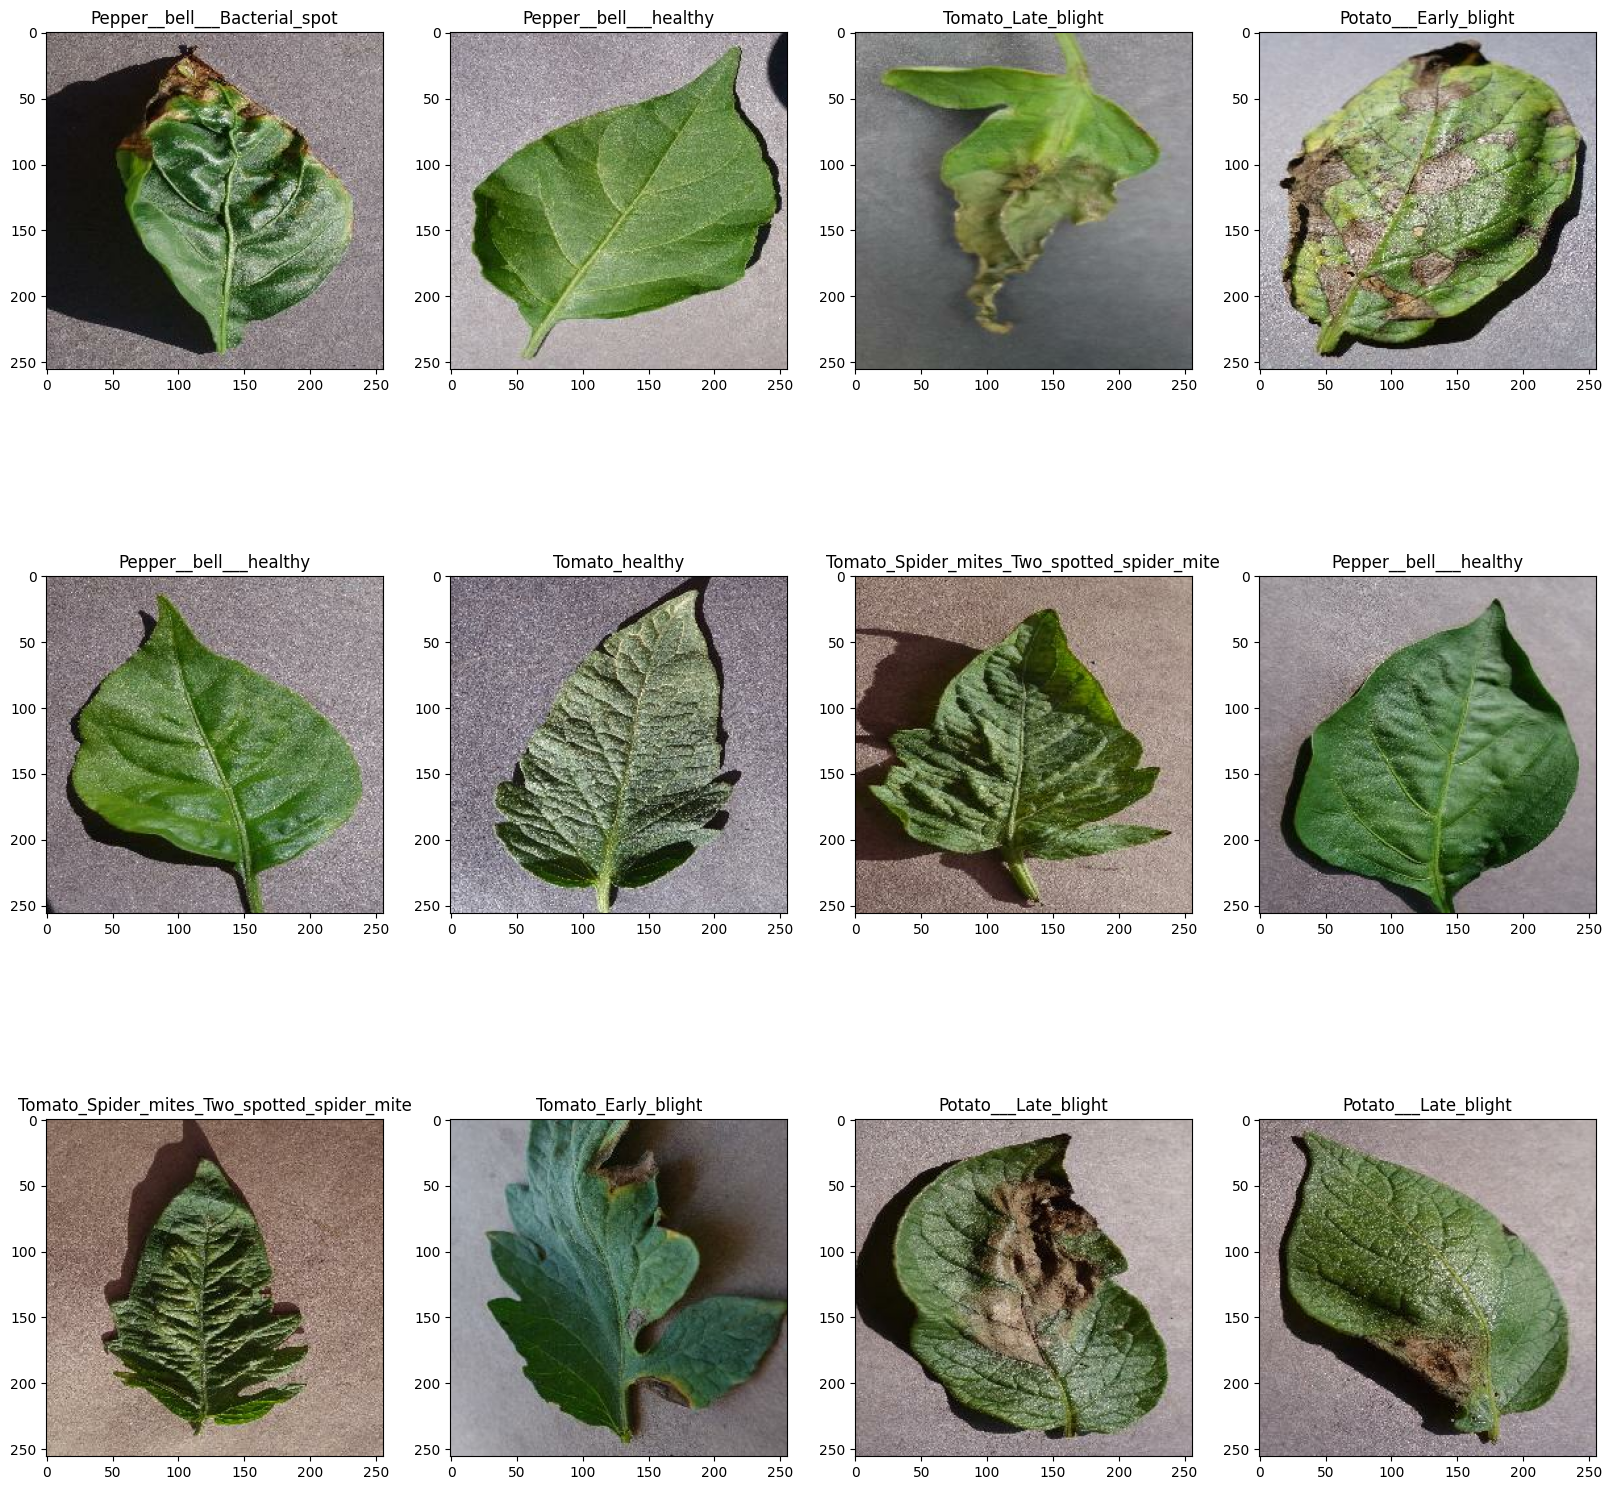

In [37]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        print(image_batch.shape)
        print(label_batch.numpy())
        print(image_batch[0].shape)
    #     plottig the images 
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))

## Start train test split

In [10]:
train_size = 0.8
dataset.take(10)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
train_sets = len(dataset)* train_size

### Calculate data for train and split

In [38]:
train_dataset = dataset.take(int(train_sets))
len(train_dataset)

516

In [39]:
test_dataset = dataset.skip(int(train_sets))
len(test_dataset)

129

In [40]:
validation_size = 0.1
len(dataset)*validation_size

64.5

In [41]:
validation_dataset = test_dataset.take(64)
len(validation_dataset)

64

In [42]:
act_test_dataset = test_dataset.skip(64)

In [45]:
def get_dataset_partitions_to_tf(dataset, train_split=0.8, test_split=0.1,validation_split=0.1,shuffle=True,shuffle_size=1000):
    
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split* dataset_size)
    validation_size = int(validation_split * dataset_size)
    
    train_dataset = dataset.take(train_size)
    validation_dataset = dataset.skip(train_size).take(validation_size)
    test_dataset = dataset.skip(train_size).skip(validation_size)
    
    return train_dataset, validation_dataset, test_dataset
    

In [46]:
train_dataset, validation_dataset, test_dataset = get_dataset_partitions_to_tf(dataset)

In [48]:
len(train_dataset)

516

In [50]:
len(validation_dataset)

64

In [51]:
len(test_dataset)

65

## Improve training performance base on caching

In [52]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
tf.keras